# Analyze Death Rate for Developed v Developing Countries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

print('Modules are imported.')

Modules are imported.


# Load CSV Death Data

In [2]:
corona_virus_dataset_csv=pd.read_csv("time_series_covid19_deaths_global.csv")
corona_virus_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,172,176,182,188,189,193,199,200,205,208
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,58,59,62,64,67,70,75,78,80,80
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3813,3979,4106,4251,4411,4523,4606,4764,5004,5213
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,762,768,770,772,777,785,791,796,803,806
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,50,50,50,50,50,50,50,50,50,51


In [3]:
corona_virus_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)
corona_virus_dataset_csv

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354
1,NaN,Albania,0,0,0,0,0,0,0,0,...,172,176,182,188,189,193,199,200,205,208
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,53
4,NaN,Angola,0,0,0,0,0,0,0,0,...,58,59,62,64,67,70,75,78,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,84,86,89,92,94,96,97,100,104,105
262,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,0,0,0,0,0,0,0,0,...,499,506,508,508,512,512,515,518,523,528
264,NaN,Zambia,0,0,0,0,0,0,0,0,...,171,173,176,199,200,203,235,241,241,246


In [4]:
death_aggregate=corona_virus_dataset_csv.groupby("Country/Region").sum()
death_aggregate

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354
Albania,0,0,0,0,0,0,0,0,0,0,...,172,176,182,188,189,193,199,200,205,208
Algeria,0,0,0,0,0,0,0,0,0,0,...,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333
Andorra,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,53
Angola,0,0,0,0,0,0,0,0,0,0,...,58,59,62,64,67,70,75,78,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,84,86,89,92,94,96,97,100,104,105
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,...,499,506,508,508,512,512,515,518,523,528


# Plot Deaths For Select Countries

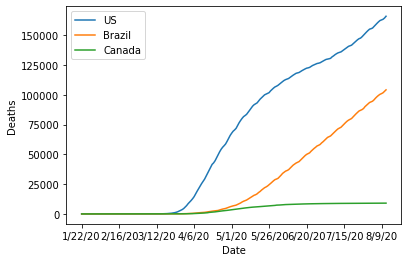

In [5]:
death_aggregate.loc["US"].plot()
death_aggregate.loc["Brazil"].plot()
death_aggregate.loc["Canada"].plot()
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()

# Finding rate of death over time

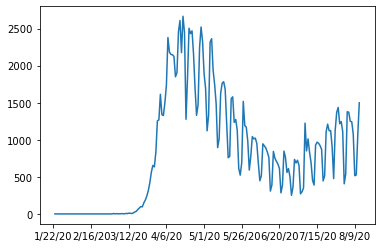

In [6]:
death_aggregate.loc["US"].diff().plot()

In [7]:
death_aggregate.loc["US"].diff().max()

2666.0

# Creating new dataframe with goal of max death rate for each country

In [8]:
max_death_rate=[]
countries_list=list(death_aggregate.index)
for c in countries_list:
    max_death_rate.append(death_aggregate.loc[c].diff().max())
death_aggregate["max_death_rate"]=max_death_rate
death_aggregate

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1288,1294,1298,1307,1312,1312,1328,1344,1354,46.0
Albania,0,0,0,0,0,0,0,0,0,0,...,176,182,188,189,193,199,200,205,208,6.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,1248,1261,1273,1282,1293,1302,1312,1322,1333,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,53,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,59,62,64,67,70,75,78,80,80,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,86,89,92,94,96,97,100,104,105,7.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,506,508,508,512,512,515,518,523,528,52.0


In [9]:
max_death_df=pd.DataFrame(death_aggregate["max_death_rate"])
max_death_df

,max_death_rate
Country/Region,
Afghanistan,46.0
Albania,6.0
Algeria,30.0
Andorra,4.0
Angola,6.0
...,...
West Bank and Gaza,7.0
Western Sahara,1.0
Yemen,52.0


# Read in Happiness CSV

In [10]:
worldwide_happiness=pd.read_csv("worldwide_happiness_report.csv")
worldwide_happiness.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [11]:
remove=['Score',"Overall rank","Perceptions of corruption", "Generosity"]
worldwide_happiness.drop(remove,axis=1,inplace=True)
worldwide_happiness

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


# Set country to index to facilitate join

In [12]:
worldwide_happiness.set_index(["Country or region"],inplace=True)
worldwide_happiness

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


In [13]:
data=worldwide_happiness.join(max_death_df,how='inner')
data

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rate
Finland,1.340,1.587,0.986,0.596,43.0
Denmark,1.383,1.573,0.996,0.592,22.0
Norway,1.488,1.582,1.028,0.603,16.0
Iceland,1.380,1.624,1.026,0.591,5.0
Netherlands,1.396,1.522,0.999,0.557,234.0
...,...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555,1.0
Tanzania,0.476,0.885,0.499,0.417,6.0
Afghanistan,0.350,0.517,0.361,0.000,46.0
Central African Republic,0.026,0.000,0.105,0.225,7.0


# Draw correlation between Happiness metrics and Death Rate

In [14]:
data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rate
GDP per capita,1.000000,0.757521,0.859431,0.394799,0.146519
Social support,0.757521,1.000000,0.751632,0.456317,0.118977
Healthy life expectancy,0.859431,0.751632,1.000000,0.423146,0.185891
Freedom to make life choices,0.394799,0.456317,0.423146,1.000000,0.096518
max_death_rate,0.146519,0.118977,0.185891,0.096518,1.000000


# GDP v Death Rate

/Users/ajaymajmudar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


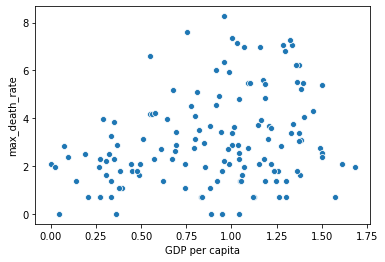

In [15]:
x=data["GDP per capita"]
y=data["max_death_rate"]
sns.scatterplot(x,np.log(y))

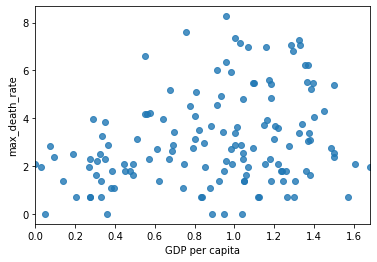

In [16]:
sns.regplot(x,np.log(y))

# Social Support v Death Rate

/Users/ajaymajmudar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


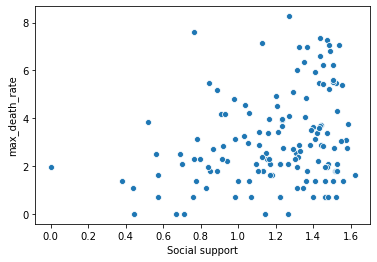

In [17]:
x = data['Social support']
y = data['max_death_rate']
sns.scatterplot(x,np.log(y))

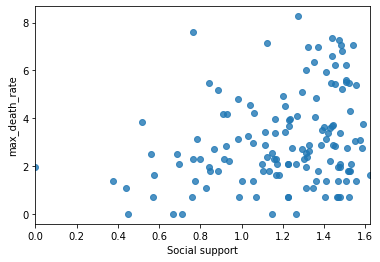

In [18]:
sns.regplot(x,np.log(y))

# Healthy Life Expectancy v Death Rate

/Users/ajaymajmudar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


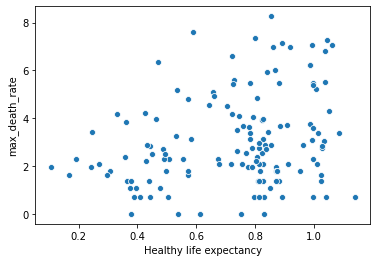

In [19]:
x = data['Healthy life expectancy']
y = data['max_death_rate']
sns.scatterplot(x,np.log(y))

# Freedom to make life choices v Death Rate


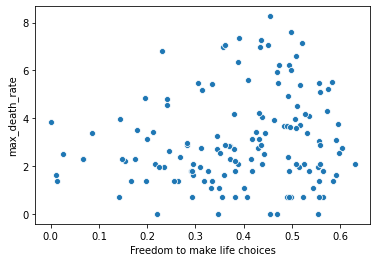

In [20]:
x = data['Freedom to make life choices']
y = data['max_death_rate']
sns.scatterplot(x,np.log(y))